### <center>Rizal Dwi Kurniawan</center>
#### <center>F1D022091</center>

# Here you can put your extraordinary code

## MODUL IV: PERBAIKAN KUALITAS CITRA DAN DETEKSI TEPI

### IMPORT LIBRARY

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Kode di atas merupakan bagian dari import library yang digunakan dalam program ini. Library numpy digunakan untuk komputasi numerik dan manipulasi array multidimensi. Library openCV digunakan untuk filter, transformasi, dan penggabungan gambar. Library matplotlib untuk membuat visualisasi data seperti grafik, plot, dan diagram.

### Membaca dan Mengubah Gambar MU Menjadi Citra Grayscale

Citra "manchester_united.jpeg" dibaca menggunakan fungsi plt.imread() dari library matplotlib yang akan menghasilkan representasi citra dalam bentuk array numpy. Setelah dibaca, citra tersebut diubah menjadi citra grayscale menggunakan 'cvtColor' dari library openCV Kemudian, ditampilkan menggunakan fungsi plt.imshow() yang juga berasal dari library Matplotlib.

(-0.5, 222.5, 233.5, -0.5)

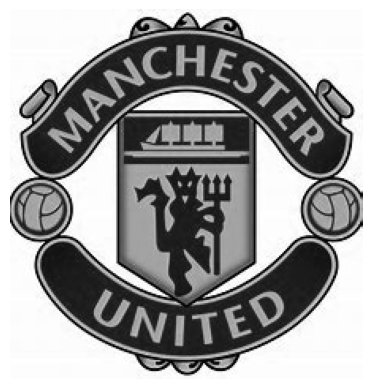

In [18]:
MUnyuk = plt.imread('../assets/manchester_united.jpeg')
MUnyuk_gray = cv.cvtColor(MUnyuk, cv.COLOR_BGR2GRAY)
plt.imshow(MUnyuk_gray, cmap='gray')
plt.axis('off')

### Mendefinisikan Kernel

In [19]:
kernel_3x3 = np.full((3,3), 1/9)
kernel_9x9 = np.full((9,9), 1/81)
kernel_satu = np.array([[1/10, 1/10, 1/10], [1/10, 1/5, 1/10], [1/10, 1/10, 1/10]])
kernel_dua = np.array([[1/9, 1/9, 1/9], [1/9, 8/9, 1/9], [1/9, 1/9, 1/9]])

Kode di atas merupakan proses mendefinisikan beberapa kernel yang digunakan dalam proses pengolahan citra untuk mengubah nilai piksel dengan menerapkan operasi konvolusi, sehingga menghasilkan efek yang diinginkan dalam pengolahan citra seperti penghalusan atau peningkatan detail.

### Membuat Fungsi Mean

In [20]:
def mean(img, kernel):
    hImg, wImg = img.shape[:2]
    hKernel, wKernel = kernel.shape
    result = np.zeros((hImg, wImg), dtype=np.uint8)
    for i in range(hKernel//2, hImg - hKernel//2):
        for j in range(wKernel//2, wImg - wKernel//2):
            sub_img = img[i - hKernel//2:i + hKernel//2 + 1, j - hKernel//2:j + hKernel//2 + 1]
            sum_val = 0
            for baris in range(hKernel):
                for kolom in range(wKernel):
                    sum_val += kernel[baris, kolom] * sub_img[baris, kolom]
            result[i, j] = sum_val
    
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if i < 4 or i >= result.shape[0]-4 or j < 4 or j>=result.shape[1]-4:
                if result[i][j] == 0 :
                    result[i][j] = 250
                if result[i][j] == 250 and (((j >= 0 and j < 4) or (j <= result.shape[1]-0 and j >= result.shape[1]-4)) and i > 114 and i <= 137):
                    result[i][j] = 113
                

    return result

Fungsi 'mean' merupakan penerapan filter mean pada citra input menggunakan kernel yang ditentukan. Operasi konvolusi dilakukan pada citra, setelah itu piksel di pinggiran ditangani secara khusus yang dimana nilai nol diganti menjadi 250, kemudian nilai 250 pada pinggiran atas atau bawah serta di kolom tertentu diganti menjadi 113.

### Membuat Fungsi Median

In [21]:
def median(img, kernel):
    hImg, wImg = img.shape
    padding_height = kernel.shape[0]//2
    padding_width = kernel.shape[1]//2
    padded_img = np.pad(img, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')

    result = np.zeros((hImg, wImg), dtype=np.uint8)

    for i in range(hImg):
        for j in range(wImg):
            sub_img = padded_img[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            sub_image = np.ravel(sub_img)
            n = len(sub_image)
            for p in range(n - 1):
                min_indeks = p
                for q in range(p + 1, n):
                    if sub_image[q] < sub_image[min_indeks]:
                        min_indeks = q
                sub_image_p = sub_image[p]
                sub_image[p] = sub_image[min_indeks]
                sub_image[min_indeks] = sub_image_p
            
            median_index = kernel.shape[0] * kernel.shape[1]//2
            result[i, j] = sub_image[median_index]
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if i <= 3 or i >=result.shape[0]-4 or j<=2 or j >= result.shape[1]-2:
                if result[i][j] < 250:
                    result[i][j] = 255
    return result

Fungsi 'median' merupakan penerapan filter median pada citra input. Pertama, citra di padding dengan nilai padding sesuai dengan ukuran kernel. Setelah itu, untuk setiap piksel dalam citra, sub-citra sesuai dengan ukuran kernel diambil, dan nilai median dari sub-citra tersebut dihitung. Nilai median digunakan sebagai nilai piksel dalam citra output. Selain itu piksel di pinggiran citra yang memiliki nilai kurang dari 250 diubah menjadi 255.

### Membuat Fungsi Modus

In [22]:
def modus(img, kernel):
    hImg, wImg = len(img), len(img[0])
    result = np.zeros((hImg, wImg), dtype=np.uint8)
    hKernel, wKernel = len(kernel), len(kernel[0])
    half_hKernel, half_wKernel = hKernel//2, wKernel//2

    for i in range(half_hKernel, hImg - half_hKernel):
        for j in range(half_wKernel, wImg - half_wKernel):
            temp_angka = [0] * 256
            max_val, max_angka = -1, -1

            for k in range(hKernel):
                for l in range(wKernel):
                    val = img[i - half_hKernel + k][j - half_wKernel + l]
                    temp_angka[val] += 1
                    if temp_angka[val] > max_angka:
                        max_angka = temp_angka[val]
                        max_val = val
            
            result[i][j] = max_val
            
    for i in range(result.shape[0]):
        for j in range(result.shape[1]): 
            if result[i][j] == 0:
                result[i][j] = 255
    return result
    

Fungsi 'modus' merupakan penerapan filter modus pada citra input dengan menggunakan kernel yang ditentukan. Untuk setiap piksel dalam citra, nilai modus dihitung di sekitar sub-citra yang sesuai dengan ukuran kernel, dan nilai modus tersebut dijadikan nilai piksel dalam citra output. Piksel dengan nilai 0 diubah menjadi 255.

### Membuat Fungsi Konvolusi

In [23]:
def konvolusi(img, kernel):
    hImg, wImg = img.shape
    hKernel, wKernel = kernel.shape

    pad_height = hKernel // 2
    pad_width = wKernel // 2

    pad_img = np.pad(img.astype(float), pad_width=((pad_height, pad_height), (pad_width, pad_width)), mode='edge')
    result = np.zeros_like(img, dtype=float)
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum += pad_img[i+k, j+l] * kernel[k, l]
            result[i, j] = sum
    return result

Fungsi 'Konvolusi' menerima citra dan kernel sebagai input, dan mengoperasikan operasi konvolusi pada citra dengan kernel yang diberikan. Ini dilakukan dengan menyesuaikan ukuran citra menggunakan padding sesuai dengan ukuran kernel dengan mode 'edge', dan kemudian melakukan operasi konvolusi pada setiap piksel dalam citra.

### Membuat Fungsi Konvolusi Gradient

In [24]:
def konvolusi_gradient(img, kernel):
    hImg, wImg = img.shape
    hKernel, wKernel = kernel.shape

    pad_height = hKernel // 2
    pad_width = wKernel // 2

    pad_img = np.pad(img.astype(float), pad_width=((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    result = np.zeros_like(img, dtype=float)
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum += pad_img[i+k, j+l] * kernel[k, l]
            result[i, j] = sum
    return result

Fungsi 'Konvolusi_Gradient' menerima citra dan kernel sebagai input, dan mengoperasikan operasi konvolusi pada citra dengan kernel yang diberikan. Ini dilakukan dengan menyesuaikan ukuran citra menggunakan padding sesuai dengan ukuran kernel dengan ukuran 'constant', dan kemudian melakukan operasi konvolusi pada setiap piksel dalam citra.

### Membuat Fungsi Preview

In [25]:
def preview(mean3x3, mean9x9, sharpening, smoothing, modus3x3, modus9x9, median3x3, median9x9, jenis=''):
    figure = plt.figure(figsize = [15,15])

    figure.add_subplot (2,5,1)
    plt.title (jenis + ' Mean 3x3')
    plt.imshow (mean3x3, cmap = 'gray')
    plt.axis('off')

    figure.add_subplot (2,5,2)
    plt.title (jenis + ' Mean 9x9')
    plt.imshow (mean9x9, cmap = 'gray')
    plt.axis('off')

    figure.add_subplot (2,5,3)
    plt.title (jenis + ' Sharpening')
    plt.imshow (sharpening, cmap = 'gray')
    plt.axis('off')

    figure.add_subplot (2,5,4)
    plt.title (jenis + ' Smoothing')
    plt.imshow (smoothing, cmap = 'gray')
    plt.axis('off')

    figure.add_subplot (1,5,1)
    plt.title (jenis + ' Modus 3x3')
    plt.imshow (modus3x3, cmap = 'gray')
    plt.axis('off')

    figure.add_subplot (1,5,2)
    plt.title (jenis + ' Modus 9x9')
    plt.imshow (modus9x9, cmap = 'gray')
    plt.axis('off')

    figure.add_subplot (1,5,3)
    plt.title (jenis + ' Median 3x3')
    plt.imshow (median3x3, cmap = 'gray')
    plt.axis('off')

    figure.add_subplot (1,5,4)
    plt.title (jenis + ' Median 9x9')
    plt.imshow (median9x9, cmap = 'gray')
    plt.axis('off')

Fungsi 'preview' digunakan untuk menampilkan hasil dari berbagai jenis filter pada citra. Fungsi ini menggunakan matplotlib untuk menampilkan citra-citra tersebut dalam satu gambar. Masing-masing citra ditampilkan dalam susuan grid yang sesuai dengan jenis filternya. Untuk setiap citra, judulnya mencakup jenis filter dan ukuran kernel yang digunakan.

### Membuat Fungsi Prewitt

In [26]:
def prewitt(img):
    gx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    gy = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

    x = konvolusi_gradient(img, gx)
    y = konvolusi_gradient(img, gy)

    magnitude = abs(x) + abs(y)

    return magnitude

Fungsi 'prewitt' merupakan penerapan filter Prewitt pada citra input untuk mendeteksi tepi. Ini dilakukan dengan melakukan konvolusi pada citra menggunakan kernel Prewitt dalam arah horizontal dan vertikal. Hasilnya adalah magnitude tepi yang dihitung dari hasil konvolusi dalam kedua arah, yang dikembalikan sebagai citra output.

### Membuat Fungsi Sobel

In [27]:
def sobel(img):
    gx = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gy = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

    x = konvolusi_gradient(img, gx)
    y = konvolusi_gradient(img, gy)

    magnitude = abs(x) + abs(y)

    return magnitude

Fungsi 'sobel' merupakan penerapan filter Sobel pada citra input untuk mendeteksi tepi. Itu dilakukan dengan melakukan konvolusi pada citra menggunakan kernel Sobel dalam arah horizontal dan vertikal. Hasilnya adalah magnitude tepi yang dihitung dari hasil konvolusi horizontal dan vertikal, yang dikembalikan sebagai citra output.

### Membuat Fungsi Roberts

In [28]:
def roberts(img):
    gx = np.array([[0, 1], [0, -1]])
    gy = np.array([[0, 0], [1, -1]])

    x = konvolusi_gradient(img, gx)
    y = konvolusi_gradient(img, gy)

    magnitude = abs(x) + abs(y)

    return magnitude

Fungsi 'roberts' merupakan penerapan filter Roberts pada citra input untuk mendeteksi tepi. Ini dilakukan dengan melakukan konvolusi pada citra menggunakan kernel Roberts dalam arah diagonal. Hasilnya adalah magnitude tepi yang dihitung dari hasil konvolusi dalam kedua arah diagonal, yang dikembalikan sebagai citra output.

### Melakukan Proses Mean, Median, Modus, Sharpening, Smoothing dan Preview

Blok Kode di bawah digunakan untuk mendefinisikan 'mean_3x3', 'mean_9x9', 'median_9x9', 'median_3x3', 'modus_3x3', 'modus_9x9', 'smoothing', dan 'sharpening' menggunakan masing-masing proses operasi. Kemudian, hasil dari masing-masing operasi tersebuat ditampilkan menggunakan fungsi 'preview'.

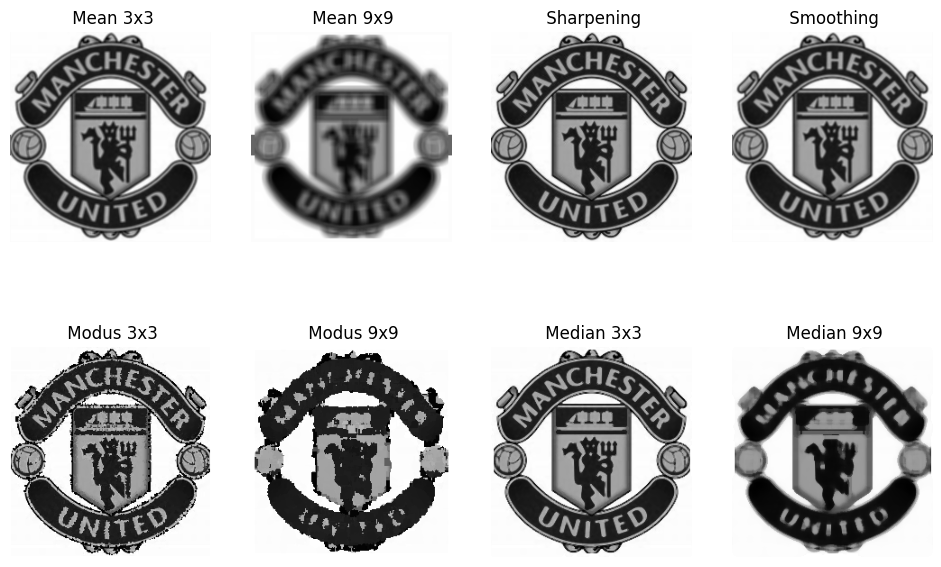

In [29]:
mean_3x3 = mean(MUnyuk_gray, kernel_3x3)
mean_9x9 = mean(MUnyuk_gray, kernel_9x9)
median_9x9 = median(MUnyuk_gray, kernel_9x9)
median_3x3 = median(MUnyuk_gray, kernel_3x3)
modus_3x3 = modus(MUnyuk_gray, kernel_3x3)
modus_9x9 = modus(MUnyuk_gray, kernel_9x9)
smoothing = mean(MUnyuk_gray, kernel_satu)
sharpening = konvolusi(MUnyuk_gray, kernel_dua)
preview(mean_3x3, mean_9x9, sharpening, smoothing, modus_3x3, modus_9x9, median_3x3, median_9x9)

### Melakukan Proses Prewitt

Blok Kode di bawah digunakan untuk mendefinisikan 'prewittMean_3x3', 'prewittMean_9x9', 'prewittSharpening', 'prewittSmoothing', 'prewittModus_3x3', 'prewittModus_9x9', 'prewittMedian_3x3', dan 'prewittMedian_9x9' menggunakan proses operasi fungsi 'prewitt'. Kemudian, hasil dari masing-masing operasi tersebuat ditampilkan menggunakan fungsi 'preview'.

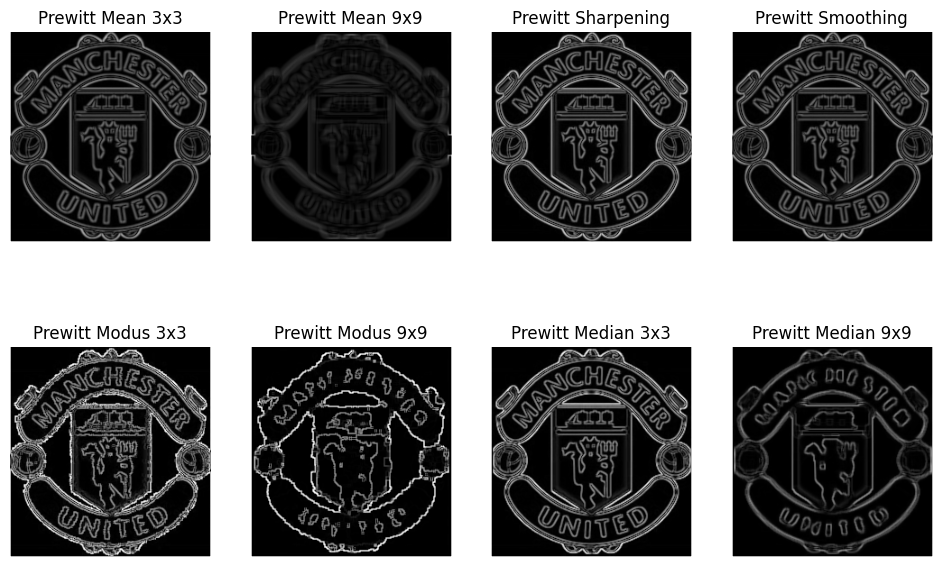

In [30]:
prewittMean_3x3 = prewitt(mean_3x3)
prewittMean_9x9 = prewitt(mean_9x9)
prewittSharpening = prewitt(sharpening)
prewittSmoothing = prewitt(smoothing)
prewittModus_3x3 = prewitt(modus_3x3)
prewittModus_9x9 = prewitt(modus_9x9)
prewittMedian_3x3 = prewitt(median_3x3)
prewittMedian_9x9 = prewitt(median_9x9)
preview(prewittMean_3x3, prewittMean_9x9, prewittSharpening, prewittSmoothing, prewittModus_3x3, prewittModus_9x9, prewittMedian_3x3, prewittMedian_9x9, 'Prewitt')

### Melakukan Proses Sobel

Blok Kode di bawah digunakan untuk mendefinisikan 'sobelMean_3x3', 'sobelMean_9x9', 'sobelSharpening', 'sobelSmoothing', 'sobelModus_3x3', 'sobelModus_9x9', 'sobelMedian_3x3', dan 'sobelMedian_9x9' menggunakan proses operasi fungsi 'sobel'. Kemudian, hasil dari masing-masing operasi tersebuat ditampilkan menggunakan fungsi 'preview'.

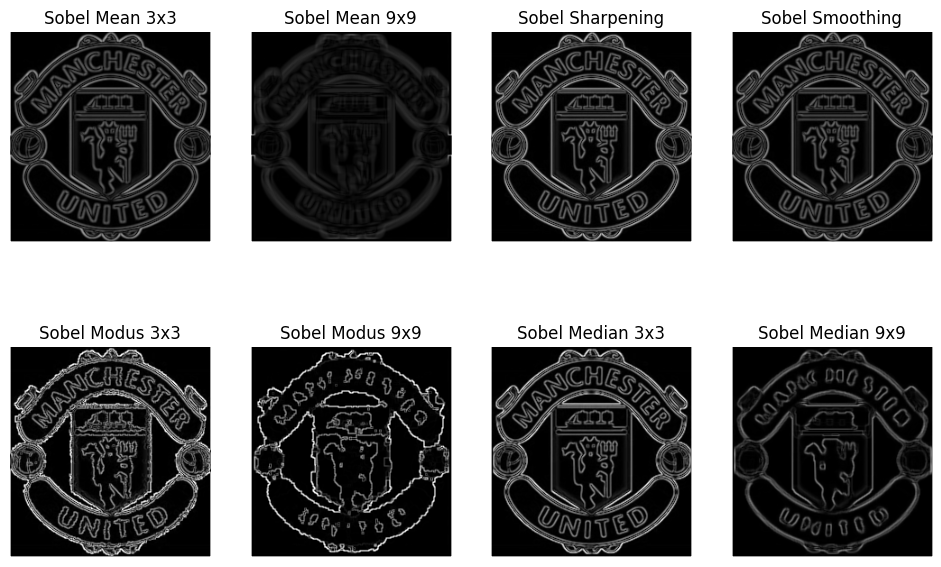

In [31]:
sobelMean_3x3 = sobel(mean_3x3)
sobelMean_9x9 = sobel(mean_9x9)
sobelSharpening = sobel(sharpening)
sobelSmoothing = sobel(smoothing)
sobelModus_3x3 = sobel(modus_3x3)
sobelModus_9x9 = sobel(modus_9x9)
sobelMedian_3x3 = sobel(median_3x3)
sobelMedian_9x9 = sobel(median_9x9)
preview(sobelMean_3x3, sobelMean_9x9, sobelSharpening, sobelSmoothing, sobelModus_3x3, sobelModus_9x9, sobelMedian_3x3, sobelMedian_9x9, 'Sobel')

### Melakukan Proses Roberts

Blok Kode di bawah digunakan untuk mendefinisikan 'robertsMean_3x3', 'robertsMean_9x9', 'robertsSharpening', 'robertsSmoothing', 'robertsModus_3x3', 'robertsModus_9x9', 'robertsMedian_3x3', dan 'robertsMedian_9x9' menggunakan proses operasi fungsi 'roberts'. Kemudian, hasil dari masing-masing operasi tersebuat ditampilkan menggunakan fungsi 'preview'.

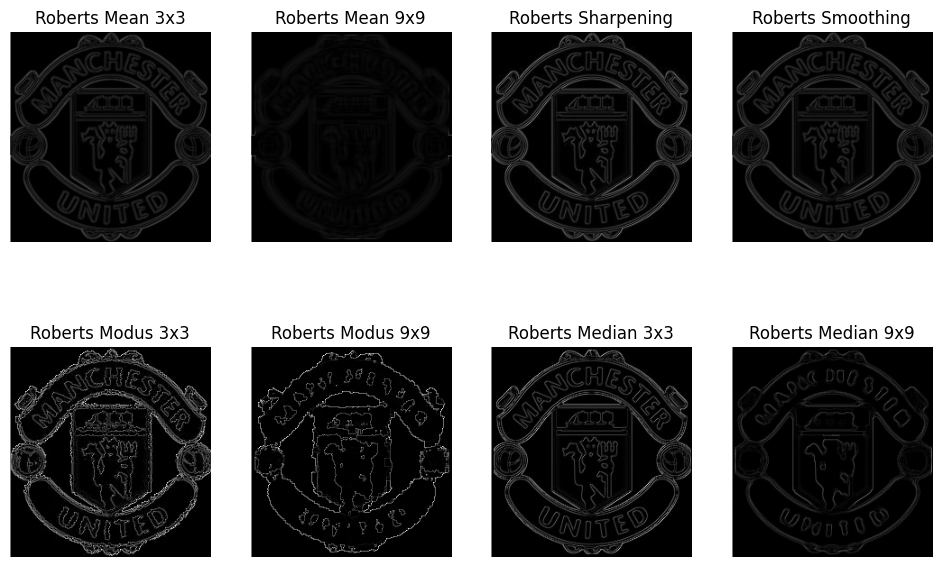

In [32]:
robertsMean_3x3 = roberts(mean_3x3)
robertsMean_9x9 = roberts(mean_9x9)
robertsSharpening = roberts(sharpening)
robertsSmoothing = roberts(smoothing)
robertsModus_3x3 = roberts(modus_3x3)
robertsModus_9x9 = roberts(modus_9x9)
robertsMedian_3x3 = roberts(median_3x3)
robertsMedian_9x9 = roberts(median_9x9)
preview(robertsMean_3x3, robertsMean_9x9, robertsSharpening, robertsSmoothing, robertsModus_3x3, robertsModus_9x9, robertsMedian_3x3, robertsMedian_9x9, 'Roberts')